## Implement Max Pooling and Average Pooling layers on feature maps and observe their effects on size and representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, uniform_filter

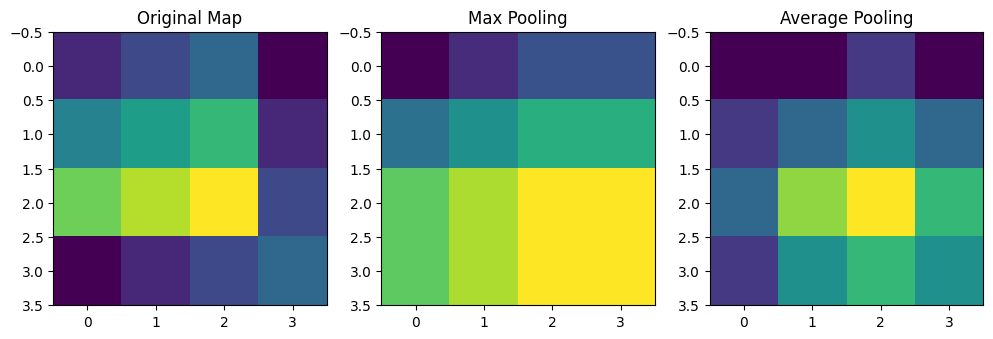

In [2]:
# create a sample feature map
feature_map=np.array([
    [1,2,3,0],
    [4,5,6,1],
    [7,8,9,2],
    [0,1,2,3]
])

# Max pooling (2x2)
max_pooled=maximum_filter(feature_map, size=2, mode='constant')

# Average pooling (2x2)
avg_pooled=uniform_filter(feature_map, size=2, mode='constant')

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))   #1row, 4 columns
axes[0].imshow(feature_map, cmap='viridis')
axes[0].set_title('Original Map')
axes[1].imshow(max_pooled, cmap='viridis')
axes[1].set_title('Max Pooling')
axes[2].imshow(avg_pooled, cmap='viridis')
axes[2].set_title('Average Pooling')
plt.show()

In [3]:
import tensorflow as tf

In [4]:
# create a sample input tensor (1x4x4x1 for batch_size, height, width, channels)
input_tensor=tf.constant(feature_map.reshape(1,4,4,1), dtype=tf.float32)

# Max Pooling
max_pool=tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')
max_pooled_tensor=max_pool(input_tensor)

# Average Pooling
avg_pool=tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, padding='valid')
avg_pooled_tensor=avg_pool(input_tensor)

print("Original Tensor Shape:", input_tensor.shape)
print(f'Max Pooled Tensor:\n{tf.squeeze(max_pooled_tensor).numpy()}')
print("Max Pooled Tensor Shape:", max_pooled_tensor.shape)
print(f'Average Pooled Tensor:\n{tf.squeeze(avg_pooled_tensor).numpy()}')
print("Average Pooled Tensor Shape:", avg_pooled_tensor.shape)

Original Tensor Shape: (1, 4, 4, 1)
Max Pooled Tensor:
[[5. 6.]
 [8. 9.]]
Max Pooled Tensor Shape: (1, 2, 2, 1)
Average Pooled Tensor:
[[3.  2.5]
 [4.  4. ]]
Average Pooled Tensor Shape: (1, 2, 2, 1)


In [5]:
import torch
import torch.nn as nn

In [6]:
# create a sample input tensor (1x4x4x1 for batch_size, , channels height, width)
input_torch=torch.tensor(feature_map, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Max Pooling
max_pool1=nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
max_pooled_torch=max_pool1(input_torch)

# Average Pooling
avg_pool1=nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
avg_pooled_torch=avg_pool1(input_torch)

print("Original Tensor Shape:", input_torch.shape)
print(f'Max Pooled Tensor:\n{max_pooled_torch.squeeze().squeeze().numpy()}')
print("Max Pooled Tensor Shape:", max_pooled_torch.shape)
print(f'Average Pooled Tensor:\n{avg_pooled_torch.squeeze().squeeze().numpy()}')
print("Average Pooled Tensor Shape:", avg_pooled_torch.shape)

Original Tensor Shape: torch.Size([1, 1, 4, 4])
Max Pooled Tensor:
[[5. 6.]
 [8. 9.]]
Max Pooled Tensor Shape: torch.Size([1, 1, 2, 2])
Average Pooled Tensor:
[[3.  2.5]
 [4.  4. ]]
Average Pooled Tensor Shape: torch.Size([1, 1, 2, 2])


Tensorflow example

In [9]:
# Define a Sequential model using the Keras API
model_tf = tf.keras.Sequential([

    # Input layer specifying the shape of the input images (32x32 RGB images)
    tf.keras.Input(shape=(32, 32, 3)),

    # First convolutional layer:
    # - 32 filters (feature detectors)
    # - Each filter is of size 3x3
    # - 'relu' activation introduces non-linearity
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # First pooling layer (MaxPooling):
    # - Reduces spatial dimensions by taking the maximum value over a 2x2 region
    # - Helps in reducing computation and controlling overfitting
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer:
    # - 64 filters of size 3x3
    # - Again uses ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Second pooling layer (AveragePooling):
    # - Instead of max, it takes the average value in each 2x2 region
    # - Useful for smoothing feature maps
    tf.keras.layers.AveragePooling2D((2, 2)),
])


Pytorch example

In [10]:
import torch
import torch.nn as nn

# Define a custom CNN class by subclassing nn.Module
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer:
        # - Input has 3 channels (RGB image)
        # - Outputs 32 feature maps
        # - Kernel size of 3x3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)

        # First pooling layer:
        # - Max pooling with 2x2 window
        # - Stride of 2 (non-overlapping regions)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer:
        # - Input has 32 channels (output of conv1)
        # - Outputs 64 feature maps
        # - Kernel size of 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)

        # Second pooling layer:
        # - Average pooling with 2x2 window
        # - Stride of 2
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

    # Define the forward pass
    def forward(self, x):
        # Apply first convolution + ReLU activation
        x = torch.relu(self.conv1(x))

        # Apply first max pooling
        x = self.pool1(x)

        # Apply second convolution + ReLU activation
        x = torch.relu(self.conv2(x))

        # Apply second average pooling
        x = self.pool2(x)

        return x
